<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/11_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EC%95%84%EC%9D%B4%EB%A6%AC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중분류 - iris 품종분류

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터전처리

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# X  data는 정규화
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(iris.data)
X_scaled.shape

(150, 4)

In [ ]:
# Y - data는 on-hot encoding # 1차원 y_test  격상 . 이차원 Y-onehot  크게 대접해주기
from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(iris.target)
Y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_onehot, stratify=Y_onehot, test_size=0.2, random_state=seed)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
# 데이터가 너무 없는데 테스트에 뺏기고. 실제로 밸리데이션 검증에 뺏기면 데이터 없어. 디폴트 0.25에서 test_size=0.2

- 모델 정의/설정/학습/평가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- 한번 생각해보자 우리가 예전에 어떻게 했는지.

이진분류면 input 들어갈때 나의 노드의 개수를 이야기하고 input dim 을 줬지 .
그러니 노드는 약 10개, input_dim=4, relu

그러나 클래스 0,1,2 아이리스 다중분류에서는 활성화 함수로 softmax
loss함수로 categorical _ crossenrtropy 

새롭게 알게된것 아웃풋 노드 3개, sotfmax, loss 함수 카테고리컬 크로스엔트로피

In [ ]:
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')              # Output layer
])
model.summary()
# 파라미터 80개 밖에 없어 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 실행환견설정 .compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# his = model.fit(
#     X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0
# )

his = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=0
)

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 17ms/step - loss: 0.3101 - accuracy: 0.8667


[0.31006133556365967, 0.8666666746139526]

- 모델 저장 / 로드

In [ ]:
#
# 코렙 어떻게 생겨먹었는지 
# !mkdir model

In [ ]:
model.save('model/iris.h5')

In [ ]:
# 
from tensorflow.keras.models import load_model
my_model = load_model('model/iris.h5')

In [ ]:
my_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 123ms/step - loss: 0.3101 - accuracy: 0.8667


[0.31006133556365967, 0.8666666746139526]

- 학습과정 시각화

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_acc = his.history['accuracy']
y_vloss = his.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

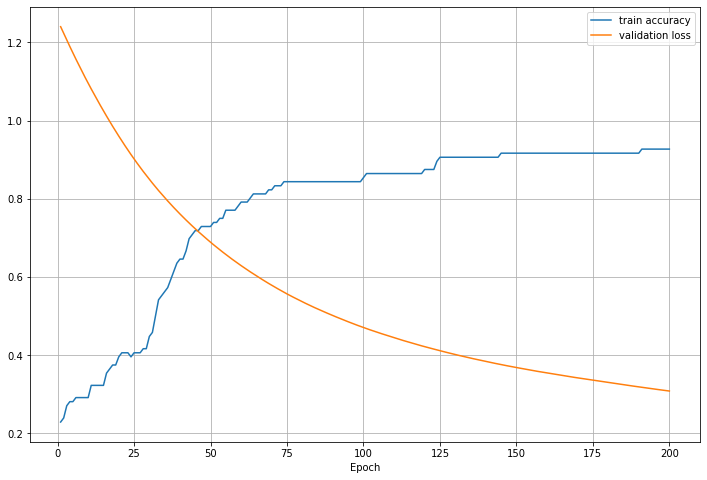

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [ ]:
# val_loss 모양 보니 좀더 학습해도 좋을것 같다. 바닥찍고 올라가는 모양

- Epoch 횟수를 더 늘려서 학습을 해보자

In [ ]:
# del model

In [ ]:
# del model2

In [ ]:
#model2
model2 = Sequential([
    Dense(16, input_dim=4, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')              # Output layer
])
# model2.summary()

In [ ]:
model2.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [ ]:
his2 = model2.fit(
    X_train, Y_train, validation_split=0.2, epochs=1000, batch_size=50, verbose=0
)

In [ ]:
model2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.1260 - accuracy: 0.9000


[0.12595099210739136, 0.8999999761581421]

In [ ]:
y_acc = his2.history['accuracy']
y_vloss = his2.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

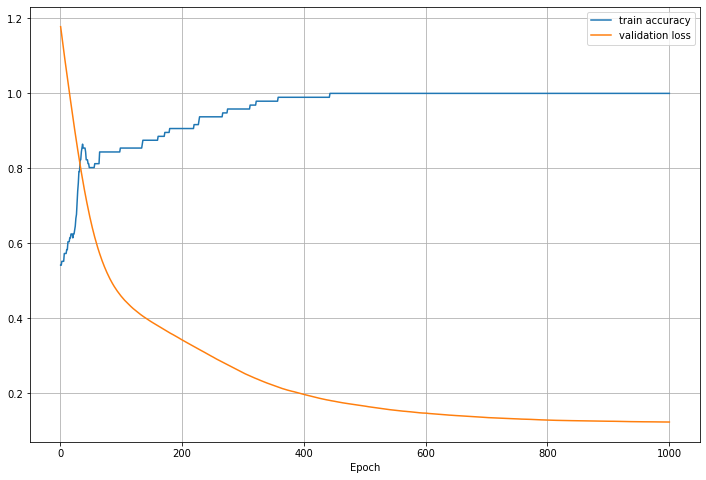

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()